# What's going on in NMP?

## Import Packages

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
%matplotlib inline
import matplotlib.pyplot as plt

## Load Data

In [2]:
df_goals = pd.read_csv('../data/NMP/cooked_data/goals_by_user.csv', index_col='user_id')
df_notes = pd.read_csv('../data/NMP/cooked_data/notes_by_user.csv', index_col='user_id').rename(columns={'frequency': 'number_notes'})
df_buttons = pd.read_csv('../data/NMP/cooked_data/buttons_by_users.csv', index_col='user_id', dtype='int')
df_graphs = pd.read_csv('../data/NMP/cooked_data/graphs_by_users.csv', index_col='user_id', dtype='int')
df_menus = pd.read_csv('../data/NMP/cooked_data/menus_by_users.csv', index_col='user_id', dtype='int')
df_users = pd.read_csv('../data/NMP/cooked_data/users.csv', index_col='user_id')

FileNotFoundError: File b'./data/NMP/cooked_data/goals_by_user.csv' does not exist

## Combining and Merging the Data Sets

In [93]:
df = df_users.join(df_goals, how='outer').join(df_notes, how='outer').join(df_buttons, how='outer').join(df_graphs, how='outer').join(df_menus, how='outer')

## EDA: df

In [94]:
# Features/Variable names
df.columns

Index(['coursera', 'email', 'gender', 'level_education', 'country', 'locale',
       'number_goals', 'average_goal_hours', 'average_goal_videos',
       'average_goal_evaluations', 'number_notes', 'Button_ComparisonDisabled',
       'Button_ComparisonEnabled', 'Button_DefineGoal',
       'Button_DownloadAllNotes', 'Button_DownloadNote', 'Button_EditNote',
       'Button_Effectiveness', 'Button_EngagementPerformance',
       'Button_FilterTime30Days', 'Button_FilterTime7Days',
       'Button_FilterTimeViewAll', 'Button_FilterViewAll', 'Button_NewNote',
       'Button_SearchNote', 'Graph_EffectivenessActivityType',
       'Graph_EffectivenessByDayWeek', 'Graph_EngagementByNumberActivities',
       'Graph_EngagementByTypeActivities', 'Graph_TimeInSessions',
       'Graph_TimeUse', 'Graph_TimeUseOnCourse', 'Menu_ChooseCourse',
       'Menu_GoalSetting', 'Menu_ViewNotes'],
      dtype='object')

In [95]:
# Preview the data
df.head(5)

,coursera,email,gender,level_education,country,locale,number_goals,average_goal_hours,average_goal_videos,average_goal_evaluations,...,Graph_EffectivenessActivityType,Graph_EffectivenessByDayWeek,Graph_EngagementByNumberActivities,Graph_EngagementByTypeActivities,Graph_TimeInSessions,Graph_TimeUse,Graph_TimeUseOnCourse,Menu_ChooseCourse,Menu_GoalSetting,Menu_ViewNotes
user_id,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,2.0,0.0,8.0,1.0,2.0,14.0,34.0,9.0,8.0
3,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,301.0,0.0,0.0,203.0,40.0,28.0,25.0
4,1.0,jmiguelangelsc@gmail.com,Male,master,MX,en,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.0,rikar_pga@hotmail.com,Male,master,MX,en,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,1.0,1.0
7,0.0,linamparamo@gmail.com,Female,master,US,en,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
# General data statistics 
df.describe()

,coursera,number_goals,average_goal_hours,average_goal_videos,average_goal_evaluations,number_notes,Button_ComparisonDisabled,Button_ComparisonEnabled,Button_DefineGoal,Button_DownloadAllNotes,...,Graph_EffectivenessActivityType,Graph_EffectivenessByDayWeek,Graph_EngagementByNumberActivities,Graph_EngagementByTypeActivities,Graph_TimeInSessions,Graph_TimeUse,Graph_TimeUseOnCourse,Menu_ChooseCourse,Menu_GoalSetting,Menu_ViewNotes
count,572.000000,67.000000,67.000000,67.000000,67.000000,236.000000,494.000000,494.000000,494.000000,494.000000,...,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000
mean,0.561189,1.492537,3.606965,4.531095,1.799751,3.478814,0.135628,0.342105,0.267206,0.331984,...,0.095142,0.012146,0.034413,4.609312,0.016194,0.016194,1.461538,3.447368,1.639676,2.210526
std,0.496676,1.020593,5.885817,4.066985,1.391341,4.949487,0.667885,1.406436,0.793903,1.113767,...,1.116471,0.168077,0.388514,18.277975,0.210623,0.167734,9.823469,5.453125,2.435314,4.144476
min,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,2.000000,4.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000
75%,1.000000,2.000000,3.250000,5.291667,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2.000000,2.000000
max,1.000000,7.000000,40.000000,30.000000,8.000000,44.000000,6.000000,17.000000,7.000000,19.000000,...,18.000000,3.000000,7.000000,301.000000,4.000000,2.000000,203.000000,45.000000,31.000000,57.000000


In [97]:
# Data Frame information (null, data type etc)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 693 entries, 2 to 771
Data columns (total 35 columns):
coursera                              572 non-null float64
email                                 572 non-null object
gender                                572 non-null object
level_education                       572 non-null object
country                               572 non-null object
locale                                572 non-null object
number_goals                          67 non-null float64
average_goal_hours                    67 non-null float64
average_goal_videos                   67 non-null float64
average_goal_evaluations              67 non-null float64
number_notes                          236 non-null float64
Button_ComparisonDisabled             494 non-null float64
Button_ComparisonEnabled              494 non-null float64
Button_DefineGoal                     494 non-null float64
Button_DownloadAllNotes               494 non-null float64
Button_DownloadNote

## Creating Sub Data Frames

In [126]:
# Users - Goals
df_u_g = df[pd.notnull(df['coursera'])]

## Analysis

In [106]:
df_users_goals.head(5)

,coursera,email,gender,level_education,country,locale,number_goals,average_goal_hours,average_goal_videos,average_goal_evaluations,...,Graph_EffectivenessActivityType,Graph_EffectivenessByDayWeek,Graph_EngagementByNumberActivities,Graph_EngagementByTypeActivities,Graph_TimeInSessions,Graph_TimeUse,Graph_TimeUseOnCourse,Menu_ChooseCourse,Menu_GoalSetting,Menu_ViewNotes
user_id,,,,,,,,,,,,,,,,,,,,,
27,1.0,augusto5615@gmail.com,Male,master,PE,es,1.0,3.0,2.0,1.0,...,0.0,0.0,0.0,70.0,0.0,0.0,11.0,15.0,8.0,13.0
46,1.0,macpor23@gmail.com,Female,master,ES,es,1.0,5.0,5.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10.0,2.0,1.0,0.0
64,0.0,rociorm_94@hotmail.es,Female,bachelor,ES,en,1.0,2.0,6.0,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,3.0,4.0,4.0,4.0
66,0.0,canizalesamar@gmail.com,Female,master,VE,es,1.0,2.0,4.0,3.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,3.0,4.0,1.0
68,0.0,luiszamorav@gmail.com,Male,bachelor,CL,es,1.0,3.0,6.0,1.0,...,0.0,0.0,0.0,4.0,0.0,0.0,4.0,3.0,2.0,3.0


In [109]:
#df_users_goals.plot.scatter(x='level_education', y='number_goals', c='DarkBlue')

In [131]:
df_u_g[df_u_g.level_education == 'doctoral']

,coursera,email,gender,level_education,country,locale,number_goals,average_goal_hours,average_goal_videos,average_goal_evaluations,...,Graph_EffectivenessActivityType,Graph_EffectivenessByDayWeek,Graph_EngagementByNumberActivities,Graph_EngagementByTypeActivities,Graph_TimeInSessions,Graph_TimeUse,Graph_TimeUseOnCourse,Menu_ChooseCourse,Menu_GoalSetting,Menu_ViewNotes
user_id,,,,,,,,,,,,,,,,,,,,,
35,1.0,paisanohermes@hotmail.com,Male,doctoral,UY,es,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0,2.0
77,1.0,jemendozam@herdez.com,Male,doctoral,MX,en,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,3.0
130,1.0,mm.paki@gmail.com,Female,doctoral,ES,es,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,3.0,2.0
229,1.0,t.iranzo.ponce@gmail.com,Female,doctoral,ES,en,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,9.0,0.0,0.0,6.0,0.0,0.0,0.0
249,1.0,ramiro.ripa@gmail.com,Male,doctoral,AR,en,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
294,1.0,juanelias@operativoconsulting.com,Male,doctoral,ES,en,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
346,1.0,pablorod2525@gmail.com,Male,doctoral,CL,en,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
403,1.0,raul_r2102@hotmail.com,Male,doctoral,US,es,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
468,1.0,winvi@hotmail.com,Male,doctoral,CL,en,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,2.0,0.0,1.0


In [148]:
df_u_g = df_u_g.fillna({'number_goals': 0})

In [147]:
import seaborn as sns

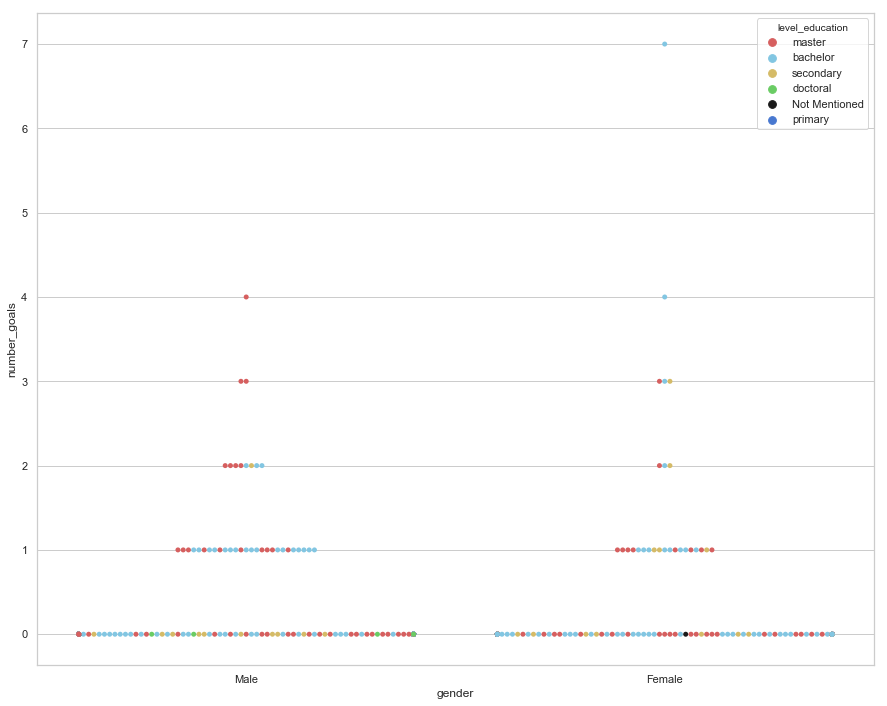

In [145]:
sns.set(style="whitegrid", palette="muted", rc={'figure.figsize':(15,12)})


# Draw a categorical scatterplot to show each observation
sns.swarmplot(x='gender', y="number_goals", hue="level_education",
              palette=["r", "c", "y", "g", "k", "b"], data=df_u_g)

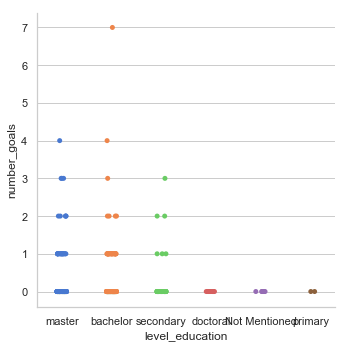

In [146]:
sns.catplot(x="level_education", y="number_goals", data=df_u_g);

In [119]:
df_users_goals.level_education.describe()

count           65
unique           3
top       bachelor
freq            32
Name: level_education, dtype: object

In [125]:
df_users[df_users.level_education == 'doctoral']

,coursera,email,gender,level_education,country,locale
user_id,,,,,,
35,1,paisanohermes@hotmail.com,Male,doctoral,UY,es
77,1,jemendozam@herdez.com,Male,doctoral,MX,en
130,1,mm.paki@gmail.com,Female,doctoral,ES,es
229,1,t.iranzo.ponce@gmail.com,Female,doctoral,ES,en
249,1,ramiro.ripa@gmail.com,Male,doctoral,AR,en
294,1,juanelias@operativoconsulting.com,Male,doctoral,ES,en
346,1,pablorod2525@gmail.com,Male,doctoral,CL,en
403,1,raul_r2102@hotmail.com,Male,doctoral,US,es
468,1,winvi@hotmail.com,Male,doctoral,CL,en
